# **1 - Import all the Stuff**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from numpy import sum, amax
from sklearn.metrics.cluster import contingency_matrix
from sklearn.model_selection import cross_val_score

# **2 - Reading and preparing the dataset**

In [2]:
df = pd.read_csv("sequence/SMOTE/over-under-sampling.csv")
df.drop(["id"], axis=1, inplace=True)
dfs = [df[df["classe"] == cls] for cls in range(0,5)]

In [3]:
len_dfs = [len(el) for el in dfs]
len_dfs

[5592, 5592, 5592, 5592, 5592]

In [4]:
dfs_dwn_smpld = [resample(df_cls, replace = False, n_samples = min(len_dfs)) for df_cls in dfs]

In [5]:
len_dfs_dwn_smpld = [len(el) for el in dfs_dwn_smpld]
len_dfs_dwn_smpld

[5592, 5592, 5592, 5592, 5592]

In [6]:
df_downsample = pd.concat([x for x in dfs_dwn_smpld])
len(df_downsample)

27960

# **3 - Splitting the Dataset**

In [7]:
X = df.drop("classe", axis=1).copy()
y = df["classe"].copy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# **4 - Training the model**

In [9]:
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

SVC()

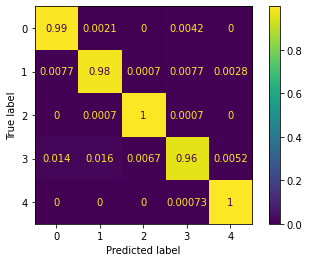

In [10]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, normalize = "true")

# **5 - Finding optimal params for the model**

In [11]:
"""param_grid = [
    {"C" : [10**x for x in range(0, 4)],
    "gamma" : ["scale"] + [1 / 10**x for x in range(0, 4)],
    "kernel" :["rbf"]},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = "adjusted_mutual_info_score",
    verbose = 0
)

optimal_params.fit(X_train_scaled, y_train)
diz = optimal_params.best_params_"""
diz = {'C': 1000, 'gamma': 1.0, 'kernel': 'rbf'}

In [12]:
from sklearn.metrics import classification_report

p_test = clf_svm.predict(X_test_scaled)

report = classification_report(y_test, p_test)

print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1419
           1       0.98      0.98      0.98      1425
           2       0.99      1.00      1.00      1423
           3       0.99      0.96      0.97      1345
           4       0.99      1.00      1.00      1378

    accuracy                           0.99      6990
   macro avg       0.99      0.99      0.99      6990
weighted avg       0.99      0.99      0.99      6990



# **6 - Training the model with optimal params**

In [13]:
# clf_svm2 = SVC(C = diz["C"], gamma = diz["gamma"], kernel = diz["kernel"])
# #scores = cross_val_score(clf_svm, X, y, cv = 10, scoring = "accuracy")
# clf_svm2.fit(X_train_scaled, y_train)
# #scores.mean()

In [14]:
# plot_confusion_matrix(clf_svm2, X_test_scaled, y_test, normalize = "true")

In [15]:
from sklearn.metrics import classification_report

p_test = clf_svm.predict(X_test_scaled)

report = classification_report(y_test, p_test)

print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1419
           1       0.98      0.98      0.98      1425
           2       0.99      1.00      1.00      1423
           3       0.99      0.96      0.97      1345
           4       0.99      1.00      1.00      1378

    accuracy                           0.99      6990
   macro avg       0.99      0.99      0.99      6990
weighted avg       0.99      0.99      0.99      6990



# **7 - Visualizing a 2D graphic of the dataset**

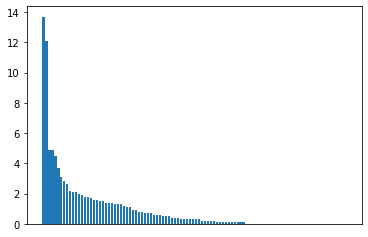

In [16]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x = range(1, len(per_var)+1), height = per_var)
plt.tick_params(
    axis = "x",
    which = "both",
    bottom = False,
    top = False,
    labelbottom = False
)

In [17]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

# param_grid = [
#     {"C" : [10**x for x in range(0, 4)],
#     "gamma" : ["scale"] + [1 / 10**x for x in range(0, 4)],
#     "kernel" :["rbf"]},
# ]

# optimal_params = GridSearchCV(
#     SVC(),
#     param_grid,
#     cv = 5,
#     scoring = "adjusted_mutual_info_score",
#     verbose = 0
# )

# optimal_params.fit(pca_train_scaled, y_train)
# diz = optimal_params.best_params_
# diz


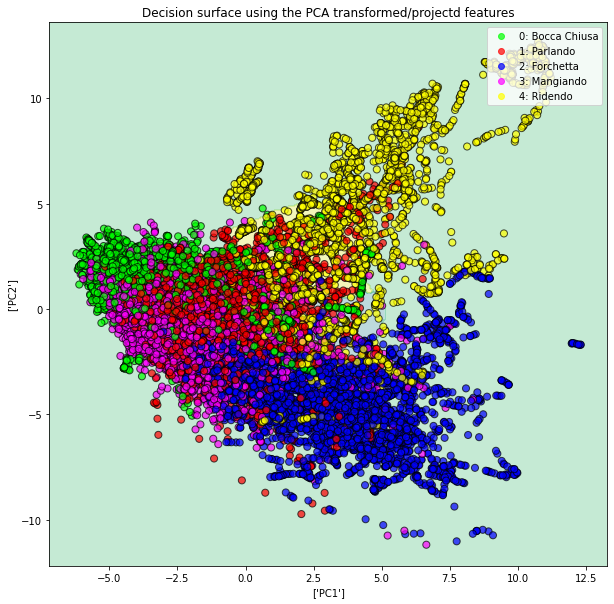

In [18]:
clf_svm = SVC()
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step = 0.1),
                     np.arange(start = y_min, stop = y_max, step = 0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize = (10,10))

ax.contourf(xx, yy, Z, alpha = 0.3)

cmap = colors.ListedColormap(["#0F0", "#F00", "#00F", "#F0F", "#FF0"])

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c = y_train,
                     cmap = cmap,
                     s = 50, 
                     edgecolors = "k", ## k = black
                     alpha = 0.7)

legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                   loc = "upper right")

legend.get_texts()[0].set_text("0: Bocca Chiusa")
legend.get_texts()[1].set_text("1: Parlando")
legend.get_texts()[2].set_text("2: Forchetta")
legend.get_texts()[3].set_text("3: Mangiando")
legend.get_texts()[4].set_text("4: Ridendo")

ax.set_ylabel(["PC2"])
ax.set_xlabel(["PC1"])
ax.set_title("Decision surface using the PCA transformed/projectd features")

plt.show()